# Titanic - Machine Learning from Disaster

Isha Singh


Professor Irene Tsapara


MSDS 422 Practical Machine Learning 


9 February 2025

File Load In

In [205]:
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [206]:
import numpy as np

In [207]:
import matplotlib.pyplot as plt

In [208]:
import seaborn as sns

In [209]:
import pandas as pd

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [254]:
from scipy.stats import shapiro

In [211]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [270]:
from sklearn.metrics import mean_squared_error, r2_score

In [319]:
from sklearn.ensemble import GradientBoostingRegressor

In [348]:
from sklearn.ensemble import ExtraTreesRegressor

SECTION 01: Descriptive Statistics

TRAINING DATA

In [212]:
titanic_train_dataframe = pd.read_csv("/Users/isingh/Desktop/titanic/train.csv")

TESTING DATA

In [213]:
titanic_test_dataframe = pd.read_csv("/Users/isingh/Desktop/titanic/test.csv")

In [214]:
titanic_test_dataframe.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [215]:
titanic_train_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [216]:
missing_values = titanic_train_dataframe.isnull().sum()

In [217]:
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Outlier

In [218]:
titanic_train_dataframe["Age"].fillna(
    titanic_train_dataframe["Age"].median(), inplace=True
)

/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_16658/2219488372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train_dataframe['Age'].fillna(titanic_train_dataframe['Age'].median(), inplace=True)


In [219]:
titanic_train_dataframe["Cabin"].fillna("Unknown", inplace=True)
titanic_train_dataframe["Embarked"].fillna(
    titanic_train_dataframe.groupby("Pclass")["Embarked"].transform(
        lambda x: x.mode().iloc[0]
    ),
    inplace=True,
)

/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_16658/2013883459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train_dataframe['Cabin'].fillna('Unknown', inplace=True)
/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_16658/2013883459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

Title

In [220]:
titanic_train_dataframe["Title"] = titanic_train_dataframe["Name"].str.extract(
    " ([A-Za-z]+)\.", expand=False
)

Family Size

In [221]:
titanic_train_dataframe["FamilySize"] = (
    titanic_train_dataframe["SibSp"] + titanic_train_dataframe["Parch"] + 1
)

Whether a family member was alone or not

In [222]:
titanic_train_dataframe["IsAlone"] = (
    titanic_train_dataframe["FamilySize"] == 1
).astype(int)

Feature Scaling

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
scaler = StandardScaler()
titanic_train_dataframe[["Age", "Fare"]] = scaler.fit_transform(
    titanic_train_dataframe[["Age", "Fare"]]
)

In [225]:
titanic_train_dataframe.duplicated().sum()

0

In [226]:
missing_values = titanic_train_dataframe.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


Outlier IQR

In [227]:
titanic_train_dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.502445,Unknown,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,1,0,PC 17599,0.786845,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.420730,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.486337,Unknown,S,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.181487,0,0,211536,-0.386671,Unknown,S,Rev,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.796286,0,0,112053,-0.044381,B42,S,Miss,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.104637,1,2,W./C. 6607,-0.176263,Unknown,S,Miss,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.258337,0,0,111369,-0.044381,C148,C,Mr,1,1


In [228]:
numeric_cols = titanic_train_dataframe.select_dtypes(
    include=[np.number]
).columns.tolist()
Q1 = titanic_train_dataframe[numeric_cols].quantile(0.25)
Q3 = titanic_train_dataframe[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
titanic_train_dataframe1 = titanic_train_dataframe[
    ~(
        (titanic_train_dataframe[numeric_cols] < lower_bound)
        | (titanic_train_dataframe[numeric_cols] > upper_bound)
    ).any(axis=1)
]

In [229]:
titanic_train_dataframe1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.502445,Unknown,S,Mr,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.488854,Unknown,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.420730,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.486337,Unknown,S,Mr,1,1
5,6,0,3,"Moran, Mr. James",male,-0.104637,0,0,330877,-0.478116,Unknown,Q,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,-0.335187,0,0,SOTON/OQ 392076,-0.506472,Unknown,S,Mr,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,-0.181487,0,0,211536,-0.386671,Unknown,S,Rev,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.796286,0,0,112053,-0.044381,B42,S,Miss,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.258337,0,0,111369,-0.044381,C148,C,Mr,1,1


Visualizations - Exploratory Data Analysis

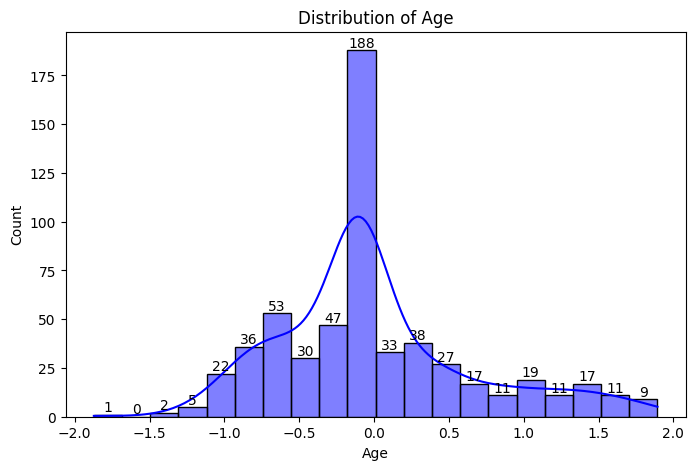

In [231]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_train_dataframe1["Age"], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )
plt.show()

/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_16658/3739617002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_train_dataframe1, palette='coolwarm', estimator=np.mean)


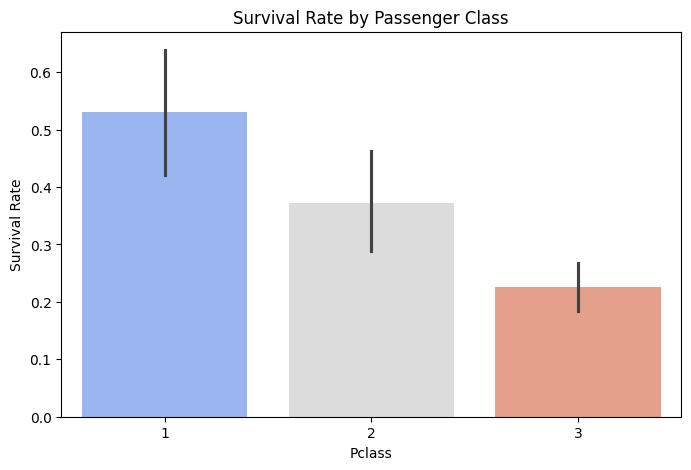

In [232]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Pclass",
    y="Survived",
    data=titanic_train_dataframe1,
    palette="coolwarm",
    estimator=np.mean,
)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_16658/2735142903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=titanic_train_dataframe1, palette='coolwarm')


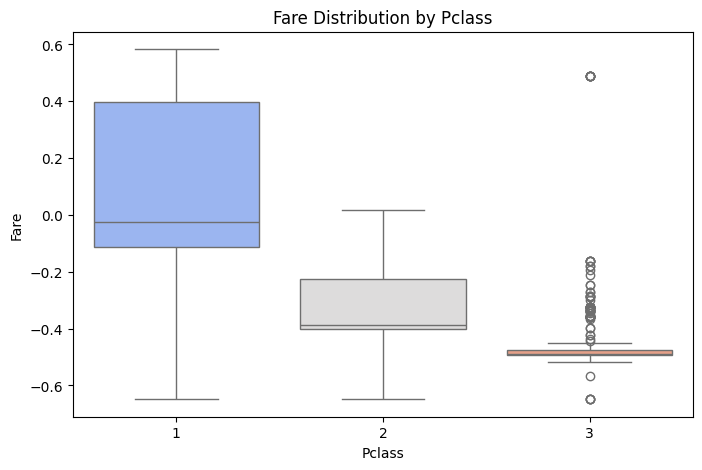

In [233]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Pclass", y="Fare", data=titanic_train_dataframe1, palette="coolwarm")
plt.title("Fare Distribution by Pclass")
plt.show()

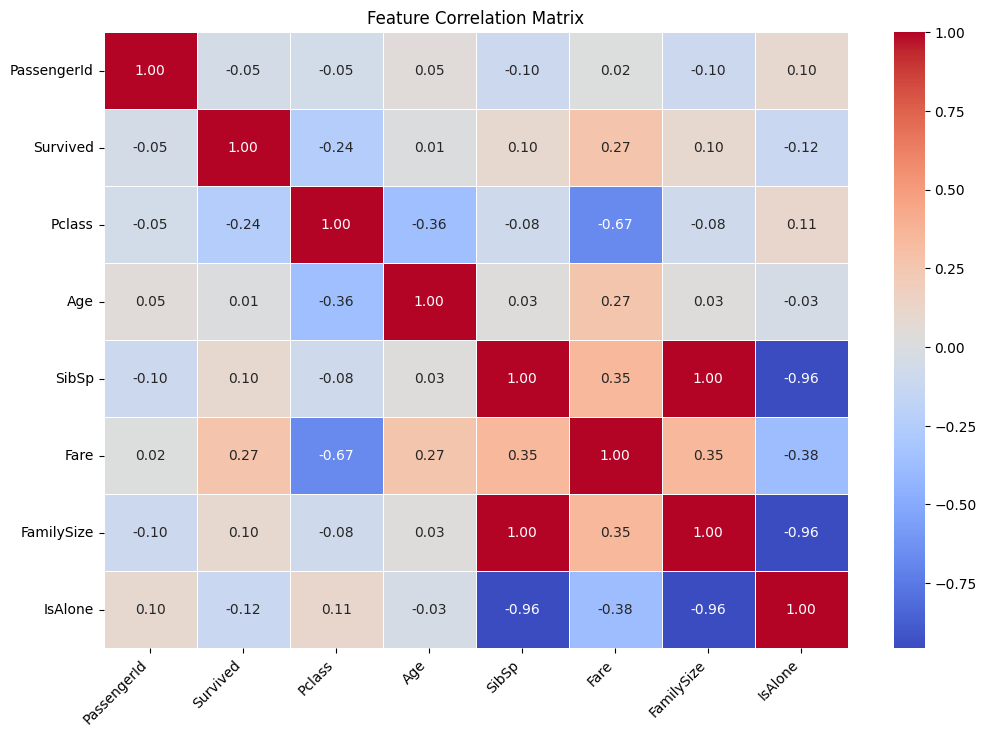

In [234]:
numeric_df = titanic_train_dataframe1.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, (numeric_df.var() > 0)]
plt.figure(figsize=(12, 8))  # Larger figure size
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Feature Correlation Matrix")

plt.show()

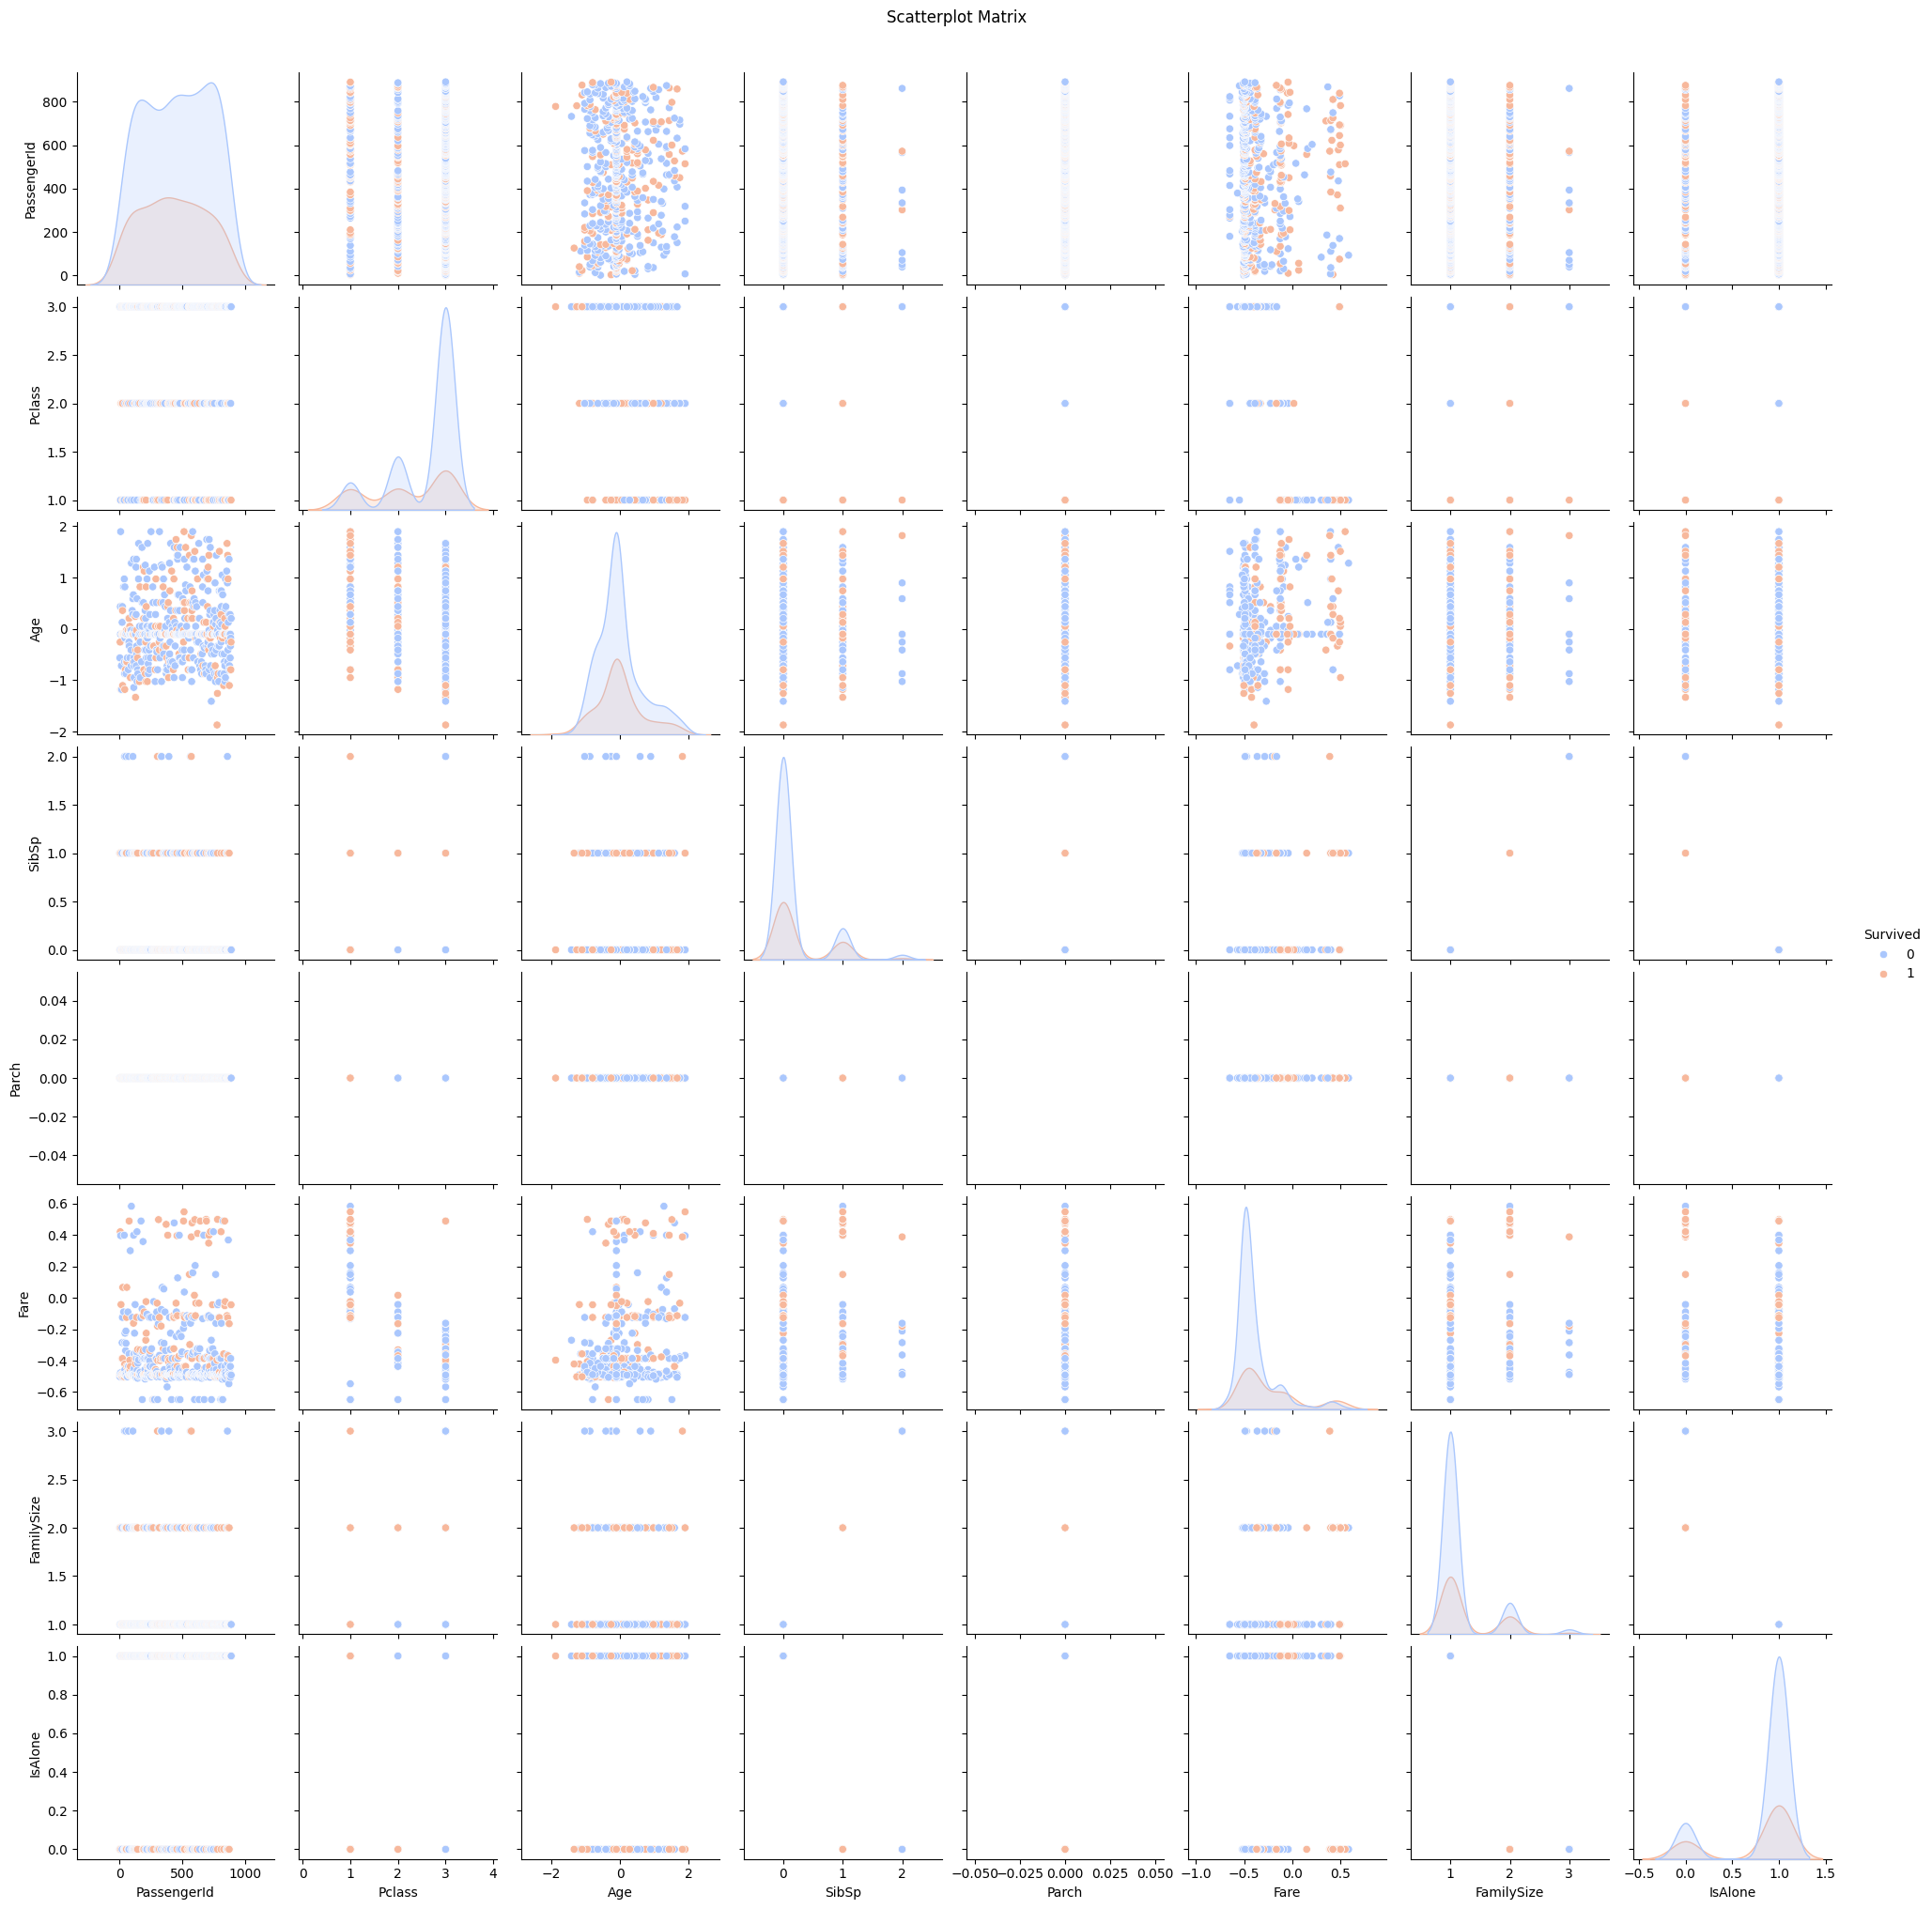

In [ ]:
numeric_cols = titanic_train_dataframe1.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols, hue="Survived", palette="coolwarm")
plt.suptitle("Scatterplot Matrix", y=1.02)
plt.show()

In [236]:
print(titanic_train_dataframe1.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
dtype: int64


Train Test Split

In [238]:
from sklearn.model_selection import train_test_split

X = titanic_train_dataframe1.drop(columns=["Survived"])  # Features
y = titanic_train_dataframe1["Survived"]  # Target

In [239]:
X = X.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], errors="ignore")

In [240]:
print(X.columns)
X.head()

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone'],
      dtype='object')


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,male,-0.565736,1,0,-0.502445,S,Mr,2,0
2,3,female,-0.258337,0,0,-0.488854,S,Miss,1,1
3,1,female,0.433312,1,0,0.420730,S,Mrs,2,0
4,3,male,0.433312,0,0,-0.486337,S,Mr,1,1
5,3,male,-0.104637,0,0,-0.478116,Q,Mr,1,1


In [ ]:
X = pd.get_dummies(X, columns=["Sex", "Embarked", "Title"], drop_first=True)

In [242]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,...,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,3,-0.565736,1,0,-0.502445,2,0,True,False,True,...,False,False,False,False,False,True,False,False,False,False
2,3,-0.258337,0,0,-0.488854,1,1,False,False,True,...,False,False,False,True,False,False,False,False,False,False
3,1,0.433312,1,0,0.420730,2,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,3,0.433312,0,0,-0.486337,1,1,True,False,True,...,False,False,False,False,False,True,False,False,False,False
5,3,-0.104637,0,0,-0.478116,1,1,True,True,False,...,False,False,False,False,False,True,False,False,False,False


In [244]:
X = X.astype(int)
X.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,...,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,3,0,1,0,0,2,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,2,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
5,3,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0


Cross Validation

In [245]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [246]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

In [247]:
print(X.dtypes)
print(X.head())

Pclass            int64
Age               int64
SibSp             int64
Parch             int64
Fare              int64
FamilySize        int64
IsAlone           int64
Sex_male          int64
Embarked_Q        int64
Embarked_S        int64
Title_Dr          int64
Title_Jonkheer    int64
Title_Lady        int64
Title_Major       int64
Title_Master      int64
Title_Miss        int64
Title_Mlle        int64
Title_Mr          int64
Title_Mrs         int64
Title_Ms          int64
Title_Rev         int64
Title_Sir         int64
dtype: object
   Pclass  Age  SibSp  Parch  Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  \
0       3    0      1      0     0           2        0         1           0   
2       3    0      0      0     0           1        1         0           0   
3       1    0      1      0     0           2        0         0           0   
4       3    0      0      0     0           1        1         1           0   
5       3    0      0      0     0           1       

In [248]:
print("Current columns in X:", X.columns)

Current columns in X: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir'],
      dtype='object')


Model Assumptions

In [ ]:
X_copy = X.copy()
vif_data = pd.DataFrame()
vif_data["Feature"] = X_copy.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_copy.values, i) for i in range(X_copy.shape[1])
]

print("VIF Values for Multicollinearity Check:")
print(vif_data.sort_values(by="VIF", ascending=False))

VIF Values for Multicollinearity Check:
           Feature          VIF
5       FamilySize  2271.694262
2            SibSp   376.023709
15      Title_Miss   176.818976
7         Sex_male   135.673565
17        Title_Mr   116.933276
18       Title_Mrs    99.053525
6          IsAlone    12.621587
10        Title_Dr     6.224177
20       Title_Rev     5.063031
12      Title_Lady     3.268537
19        Title_Ms     3.263391
16      Title_Mlle     3.255726
13     Title_Major     3.045242
14    Title_Master     2.038888
21       Title_Sir     2.030270
11  Title_Jonkheer     2.012673
8       Embarked_Q     1.820930
9       Embarked_S     1.747054
0           Pclass     1.240012
1              Age     1.194009
3            Parch          NaN
4             Fare          NaN


/Users/isingh/opt/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
numerical_cols = X_copy.select_dtypes(include=[np.number]).columns.tolist()

print("\nShapiro-Wilk Normality Test for LDA:")
for col in numerical_cols:
    try:
        stat, p = shapiro(X_copy[col])
        print(f"- {col}: p-value={p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")
    except ValueError:
        print(f"- {col}: Skipped (Shapiro test failed due to large sample size)")


Shapiro-Wilk Normality Test for LDA:
- Pclass: p-value=0.0000 (Not Normal)
- Age: p-value=0.0000 (Not Normal)
- SibSp: p-value=0.0000 (Not Normal)
- Parch: p-value=1.0000 (Normal)
- Fare: p-value=1.0000 (Normal)
- FamilySize: p-value=0.0000 (Not Normal)
- IsAlone: p-value=0.0000 (Not Normal)
- Sex_male: p-value=0.0000 (Not Normal)
- Embarked_Q: p-value=0.0000 (Not Normal)
- Embarked_S: p-value=0.0000 (Not Normal)
- Title_Dr: p-value=0.0000 (Not Normal)
- Title_Jonkheer: p-value=0.0000 (Not Normal)
- Title_Lady: p-value=0.0000 (Not Normal)
- Title_Major: p-value=0.0000 (Not Normal)
- Title_Master: p-value=0.0000 (Not Normal)
- Title_Miss: p-value=0.0000 (Not Normal)
- Title_Mlle: p-value=0.0000 (Not Normal)
- Title_Mr: p-value=0.0000 (Not Normal)
- Title_Mrs: p-value=0.0000 (Not Normal)
- Title_Ms: p-value=0.0000 (Not Normal)
- Title_Rev: p-value=0.0000 (Not Normal)
- Title_Sir: p-value=0.0000 (Not Normal)


/Users/isingh/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Random Forest Regression

In [279]:
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],  # Number of trees
    "max_features": ["sqrt", "log2", 5, 7],  # Maximum features per split
    "max_depth": [10, 20, 30, None],  # Maximum depth of each tree
    "criterion": ["squared_error", "absolute_error"],  # Valid criteria for regression
}

Gini and entropy are only valid for classification


Random Forest Regressor is a regression model, which uses different splitting criteria.

“Randomforestclassifier.” scikit. Accessed February 9, 2025. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. 

In [280]:
rf_regressor = RandomForestRegressor(random_state=42)

In [281]:
grid_search_randomforest_regressor = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Minimize MSE
)

In [282]:
grid_search_randomforest_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2', 5, 7],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [283]:
best_params_random_forest_regressor = grid_search_randomforest_regressor.best_params_
print(
    "Best parameters -- Random Forest Regressor:", best_params_random_forest_regressor
)

Best parameters -- Random Forest Regressor: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [284]:
best_model_with_randomforest = grid_search_randomforest_regressor.best_estimator_
print("Best model with Random Forest Regressor:", best_model_with_randomforest)

Best model with Random Forest Regressor: RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)


In [285]:
y_pred_random_forest = best_model_with_randomforest.predict(X_val)

In [286]:
mse_random_forest_regressor = mean_squared_error(y_val, y_pred_random_forest)
print("The mse for Random Forest Regressor is:", mse_random_forest_regressor)

The mse for Random Forest Regressor is: 0.1526500802481171


In [289]:
r_squared_random_forest_regressor = r2_score(y_val, y_pred_random_forest)
print(
    "The r-squared for Random Forest Regressor is:", r_squared_random_forest_regressor
)

The r-squared for Random Forest Regressor is: 0.23991065087298635


Kaggle Submission for Random Forest Regressor

In [ ]:
X_test = titanic_test_dataframe.drop(
    columns=["Name", "Ticket", "Cabin", "PassengerId"], errors="ignore"
)

In [307]:
X_test = pd.get_dummies(X_test, drop_first=True)

In [310]:
for col in X_copy.columns:
    if col not in X_test.columns:
        X_test[col] = 0


X_test = X_test[X_copy.columns]

In [311]:
X_test.fillna(X_test.median(), inplace=True)

In [312]:
print(" X test columns:", X_test.columns)

 X test columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir'],
      dtype='object')


In [315]:
y_pred_kaggle_randomforest_regression = best_model_with_randomforest.predict(X_test)

In [ ]:
y_pred_kaggle_binary_conversion_rdf = (
    y_pred_kaggle_randomforest_regression > 0.5
).astype(int)

In [317]:
submission_df = pd.DataFrame(
    {
        "PassengerId": titanic_test_dataframe["PassengerId"],
        "Survived": y_pred_kaggle_binary_conversion_rdf,
    }
)

In [318]:
submission_file_path = "random_forest_submission.csv"
submission_df.to_csv(submission_file_path, index=False)

Gradident Boosting

“Gradientboostingclassifier.” scikit. Accessed February 10, 2025. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. 

In [372]:
param_grid_gradient_boosting = {
    "n_estimators": [50, 150, 300],  # number of trees
    "learning_rate": [0.05, 0.1, 0.2],  ## Step size per iteration
    "max_depth": [3, 7],  # maximum number of levels in each tree
    "subsample": [0.6, 1.0],  # Fraction of data used
    "min_samples_split": [2, 10],  # Min samples to split
    "min_samples_leaf": [1, 5],  # Min samples in leaf
    "max_features": ["sqrt", "log2"],  # Features per split
}

In [327]:
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

In [328]:
grid_search_gradient_boosting_regressor = GridSearchCV(
    estimator=gradient_boosting_regressor,
    param_grid=param_grid_gradient_boosting,
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",
)

In [329]:
grid_search_gradient_boosting_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 150, 300],
                         'subsample': [0.6, 1.0]},
             scoring='neg_mean_squared_error')

In [330]:
best_params_gradient_boosting = grid_search_gradient_boosting_regressor.best_params_
print("Best parameters -- Gradient Boosting:", best_params_gradient_boosting)

Best parameters -- Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}


In [331]:
best_model_with_gradient_boosting_regressor = (
    grid_search_gradient_boosting_regressor.best_estimator_
)

In [334]:
y_pred_gradient_boosting = best_model_with_gradient_boosting_regressor.predict(X_val)

In [335]:
mse_gradient_boosting = mean_squared_error(y_val, y_pred_gradient_boosting)
print("The mse for Gradient Boosting Regressor is:", mse_gradient_boosting)

The mse for Gradient Boosting Regressor is: 0.1410699424712798


In [337]:
r_squared_gradient_boosting = r2_score(y_val, y_pred_gradient_boosting)
print("The r-squared for Gradient Boosting Regressor is:", r_squared_gradient_boosting)

The r-squared for Gradient Boosting Regressor is: 0.2975715402173664


Kaggle Submission for Gradient Boosting 

In [340]:
X_test_gradient_boosting = titanic_test_dataframe.drop(
    columns=["Name", "Ticket", "Cabin", "PassengerId"], errors="ignore"
)

In [341]:
X_test_gradient_boosting = pd.get_dummies(X_test_gradient_boosting, drop_first=True)

In [342]:
for col in X_copy.columns:
    if col not in X_test_gradient_boosting.columns:
        X_test_gradient_boosting[col] = 0

X_test_gradient_boosting = X_test_gradient_boosting[X_copy.columns]

In [343]:
X_test_gradient_boosting.fillna(X_test_gradient_boosting.median(), inplace=True)

In [344]:
y_pred_kaggle_gradient_boosting = best_model_with_gradient_boosting_regressor.predict(
    X_test_gradient_boosting
)

In [345]:
y_pred_kaggle_gradient_boosting = (y_pred_kaggle_gradient_boosting > 0.5).astype(int)

In [346]:
submission_df_gb = pd.DataFrame(
    {
        "PassengerId": titanic_test_dataframe["PassengerId"],
        "Survived": y_pred_kaggle_gradient_boosting,
    }
)

In [347]:
submission_file_path_gb = "gradient_boosting_submission.csv"
submission_df_gb.to_csv(submission_file_path_gb, index=False)

Extra Trees

“Extratreesclassifier.” scikit. Accessed February 10, 2025. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html. 

In [349]:
param_grid_extra_trees = {
    "n_estimators": [50, 150, 300],
    "max_features": ["sqrt", "log2", 0.5],
    "max_depth": [None, 10, 30],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "criterion": ["squared_error", "absolute_error"],
}

In [351]:
extra_trees_regressor = ExtraTreesRegressor(random_state=42)

In [ ]:
grid_search_extra_trees = GridSearchCV(
    estimator=extra_trees_regressor,
    param_grid=param_grid_extra_trees,
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Minimize MSE
)

In [355]:
grid_search_extra_trees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10, 30],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 150, 300]},
             scoring='neg_mean_squared_error')

In [356]:
best_params_extra_trees = grid_search_extra_trees.best_params_
print("Best parameters for Extra Trees Regressor:", best_params_extra_trees)

Best parameters for Extra Trees Regressor: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [358]:
best_model_with_extra_trees = grid_search_extra_trees.best_estimator_

In [359]:
y_pred_extra_trees = best_model_with_extra_trees.predict(X_val)

In [360]:
mse_extra_trees = mean_squared_error(y_val, y_pred_extra_trees)
print("The mse for Extra Trees Regressor is:", mse_extra_trees)

The mse for Extra Trees Regressor is: 0.13929092580937663


In [361]:
r2_extra_trees = r2_score(y_val, y_pred_extra_trees)
print("The r-squared for Extra Trees Regressor is:", r2_extra_trees)

The r-squared for Extra Trees Regressor is: 0.3064297839499226


In [362]:
X_test_extra_trees = titanic_test_dataframe.drop(
    columns=["Name", "Ticket", "Cabin", "PassengerId"], errors="ignore"
)

In [363]:
X_test_extra_trees = pd.get_dummies(X_test_extra_trees, drop_first=True)

In [365]:
for col in X_copy.columns:
    if col not in X_test_extra_trees.columns:
        X_test_extra_trees[col] = 0

X_test_extra_trees = X_test_extra_trees[X_copy.columns]

In [366]:
X_test_extra_trees.fillna(X_test_extra_trees.median(), inplace=True)

In [368]:
y_pred_kaggle_extra_trees = best_model_with_extra_trees.predict(X_test_extra_trees)

In [369]:
y_pred_kaggle_binary_extra_trees = (y_pred_kaggle_extra_trees > 0.5).astype(int)

In [370]:
submission_df_extra_trees = pd.DataFrame(
    {
        "PassengerId": titanic_test_dataframe["PassengerId"],
        "Survived": y_pred_kaggle_binary_extra_trees,
    }
)

In [371]:
submission_file_path_extra_trees = "extra_trees_submission.csv"
submission_df_extra_trees.to_csv(submission_file_path_extra_trees, index=False)

Evaluation of Models

In [383]:
model_results = pd.DataFrame(
    {
        "Model": ["Random Forest", "Gradient Boosting", "Extra Trees"],
        "MSE": [mse_random_forest_regressor, mse_gradient_boosting, mse_extra_trees],
        "R_square Score": [
            r_squared_random_forest_regressor,
            r_squared_gradient_boosting,
            r2_extra_trees,
        ],
    }
)

print("Model Performance Summary")
print(model_results.to_string(index=False))

Model Performance Summary
            Model      MSE  R_square Score
    Random Forest 0.152650        0.239911
Gradient Boosting 0.141070        0.297572
      Extra Trees 0.139291        0.306430


MSE COMPARISON

/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_16658/632806412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="MSE", data=model_results, palette="coolwarm")


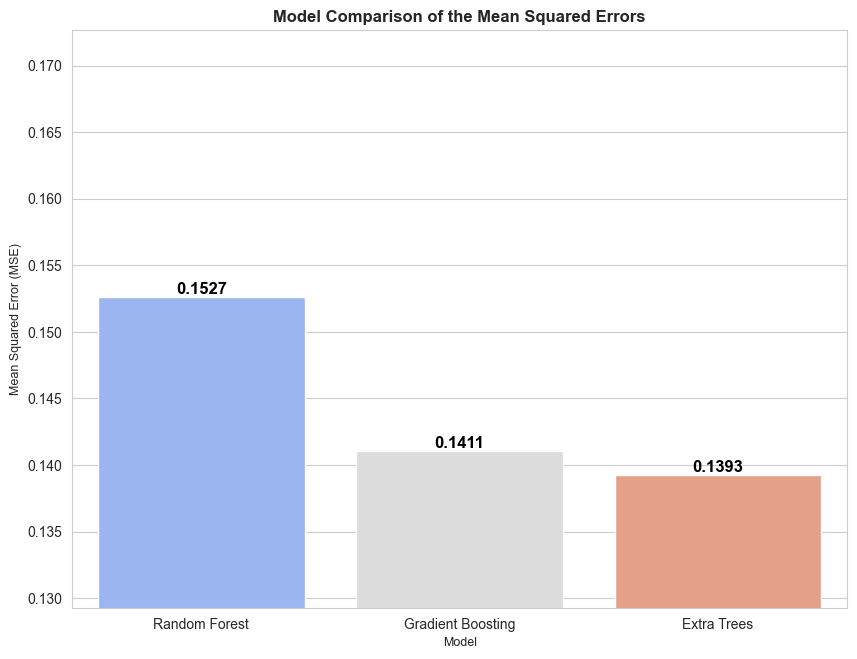

In [384]:
plt.figure(figsize=(10, 7.5))
ax = sns.barplot(x="Model", y="MSE", data=model_results, palette="coolwarm")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        color="black",
        fontweight="bold",
    )

plt.ylim(model_results["MSE"].min() - 0.01, model_results["MSE"].max() + 0.02)


# Labels and title
plt.xlabel("Model", fontsize=9)
plt.ylabel("Mean Squared Error (MSE)", fontsize=9)
plt.title("Model Comparison of the Mean Squared Errors", fontsize=12, fontweight="bold")

plt.show()

R_Squared

/var/folders/qx/htthbr0s1bx5ncc2f9j6j1qc0000gn/T/ipykernel_16658/679450378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="R_square Score", data=model_results, palette="coolwarm")


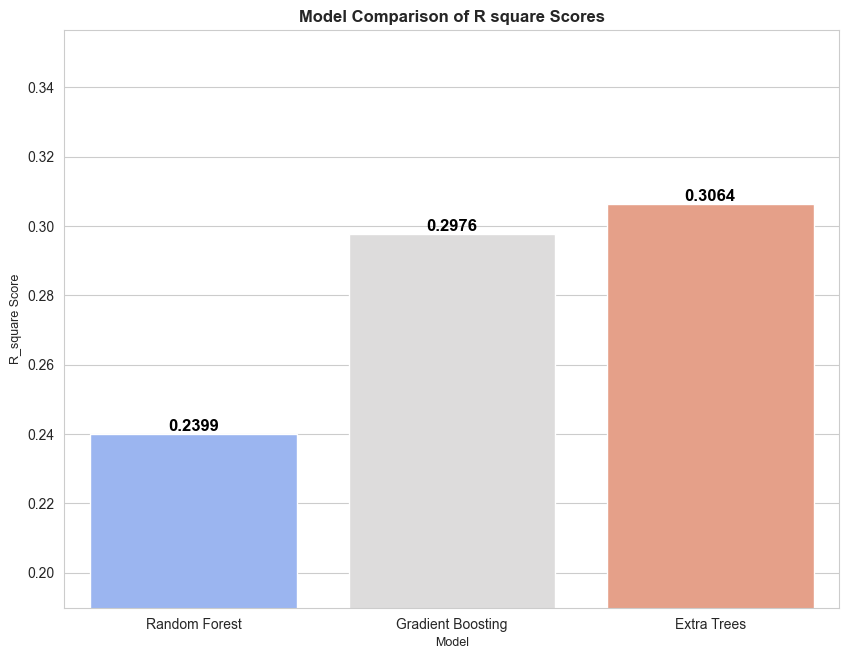

In [387]:
plt.figure(figsize=(10, 7.5))
ax = sns.barplot(x="Model", y="R_square Score", data=model_results, palette="coolwarm")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        color="black",
        fontweight="bold",
    )

plt.ylim(
    model_results["R_square Score"].min() - 0.05,
    model_results["R_square Score"].max() + 0.05,
)

plt.xlabel("Model", fontsize=9)
plt.ylabel("R_square Score", fontsize=9)
plt.title("Model Comparison of R square Scores", fontsize=12, fontweight="bold")

# Show plot
plt.show()